<a href="https://colab.research.google.com/github/carlosherediapimienta/AutoEncoders_pytorch/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Auto-encoders pytorch - Keagle (GoogleColab)

In [27]:
import warnings
warnings.filterwarnings('ignore')
!rm -R /content/Imagenes/.ipynb_checkpoints

rm: cannot remove '/content/Imagenes/.ipynb_checkpoints': No such file or directory


In [ ]:
IMG_DIR = '/content/Imagenes/Imagenes/'

# We upload the images

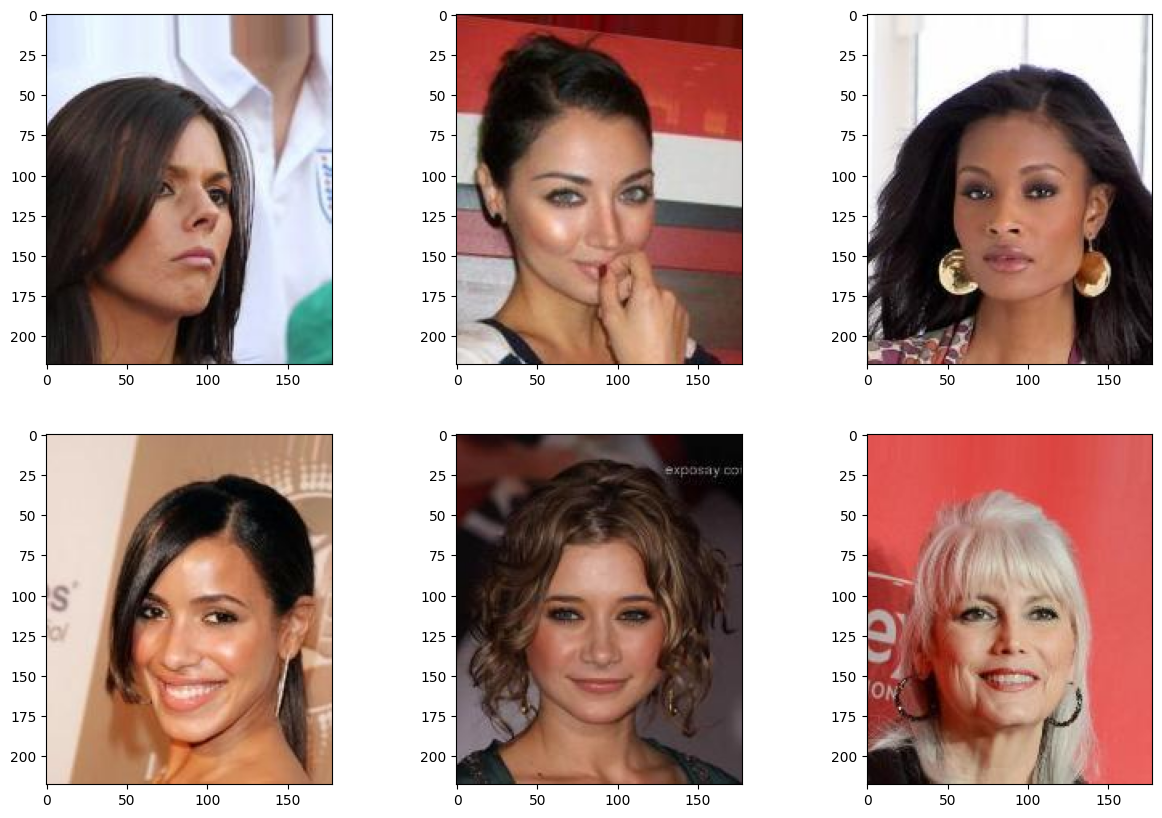

In [ ]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    choose_img = np.random.choice(os.listdir(IMG_DIR))
    image_path = os.path.join(IMG_DIR,choose_img)
    image = imageio.imread(image_path)
    plt.imshow(image)

# Autoencoders - Definition:

In [ ]:
import torch.nn as nn

class Autoencoders(nn.Module):
    def __init__(self):
        super().__init__()
        ### encoder
        self.conv1 = nn.Conv2d(3,64,5)
        self.maxpool = nn.MaxPool2d(2,return_indices=True)
        self.conv2 = nn.Conv2d(64,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        ### decoder
        self.deconv1 = nn.ConvTranspose2d(128,64,5)
        self.unpool = nn.MaxUnpool2d(2)
        self.deconv2 = nn.ConvTranspose2d(64,64,5)
        self.deconv3 = nn.ConvTranspose2d(64,3,5)

    def forward(self,x):
        x = self.conv1(x)
        x,ind1 = self.maxpool(x)
        x = self.conv2(x)
        x,ind2 = self.maxpool(x)
        x = self.conv3(x)

        x = self.deconv1(x)
        x = self.unpool(x,ind2)
        x = self.deconv2(x)
        x = self.unpool(x,ind1)
        x = self.deconv3(x)
        return x

# Training:

In [29]:
import torchvision
import torch

normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

train_transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)),torchvision.transforms.ToTensor(),normalize])

# Ruta del directorio de imágenes
data_dir = '/content/Imagenes'
train_dataloader = torch.utils.data.DataLoader(dataset=torchvision.datasets.ImageFolder(data_dir,transform=train_transform),shuffle=True,batch_size=32,num_workers=0)

# GPU:

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

# Execution:

In [32]:
import torch.optim as optim

model = Autoencoders().to(device)

criterian = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [33]:
from tqdm import tqdm_notebook as tqdm

n_epochs = 2 ### increase number of epochs for better result
for epoch in tqdm(range(n_epochs)):
    model.train()
    iteration = 0
    for data,_ in tqdm(train_dataloader):
        optimizer.zero_grad()
        data = data.to(device)
        output = model.forward(data)
        loss = criterian(output,data)
        loss.backward()
        optimizer.step()
        if iteration%1000 == 0:
            print(f'iteration: {iteration} , loss : {loss.item()}')
    print(f'epoch: {epoch} loss: {loss.item()}')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

iteration: 0 , loss : 1.7110952138900757
iteration: 0 , loss : 1.3929623365402222
iteration: 0 , loss : 85.02384948730469
iteration: 0 , loss : 1.1452481746673584
iteration: 0 , loss : 1.8290213346481323
iteration: 0 , loss : 1.8009876012802124
iteration: 0 , loss : 1.490952491760254
iteration: 0 , loss : 2.6155481338500977
iteration: 0 , loss : 1.4750938415527344
iteration: 0 , loss : 2.8170900344848633
iteration: 0 , loss : 1.2780563831329346
iteration: 0 , loss : 1.8024121522903442
iteration: 0 , loss : 1.8487896919250488
iteration: 0 , loss : 1.553201675415039
iteration: 0 , loss : 2.808260202407837
iteration: 0 , loss : 1.2138015031814575
iteration: 0 , loss : 2.3916800022125244
iteration: 0 , loss : 1.2249385118484497
iteration: 0 , loss : 1.9958224296569824
iteration: 0 , loss : 1.2973417043685913
iteration: 0 , loss : 1.8662549257278442
iteration: 0 , loss : 1.1307501792907715
iteration: 0 , loss : 1.5782595872879028
iteration: 0 , loss : 1.2011139392852783
iteration: 0 , loss 

  0%|          | 0/61 [00:00<?, ?it/s]

iteration: 0 , loss : 0.6827210187911987
iteration: 0 , loss : 0.7799347043037415
iteration: 0 , loss : 0.6830816864967346
iteration: 0 , loss : 0.7637214660644531
iteration: 0 , loss : 0.7240781784057617
iteration: 0 , loss : 0.6755247116088867
iteration: 0 , loss : 0.6555405855178833
iteration: 0 , loss : 0.7266713976860046
iteration: 0 , loss : 0.6999819874763489
iteration: 0 , loss : 0.683594286441803
iteration: 0 , loss : 0.7917600870132446
iteration: 0 , loss : 0.7049846053123474
iteration: 0 , loss : 0.6760644912719727
iteration: 0 , loss : 0.651325523853302
iteration: 0 , loss : 0.666903018951416
iteration: 0 , loss : 0.6566694378852844
iteration: 0 , loss : 0.6368867754936218
iteration: 0 , loss : 0.675859808921814
iteration: 0 , loss : 0.6240319609642029
iteration: 0 , loss : 0.6494026780128479
iteration: 0 , loss : 0.6813732981681824
iteration: 0 , loss : 0.6824668645858765
iteration: 0 , loss : 0.6413883566856384
iteration: 0 , loss : 0.6547607779502869
iteration: 0 , loss 

# Save the model:

In [36]:
torch.save(model.state_dict(),'autoencoder.h5')
model1 = Autoencoders()
model1.load_state_dict(torch.load('autoencoder.h5'))
model1.eval()

Autoencoders(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (deconv1): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(1, 1))
  (unpool): MaxUnpool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
  (deconv2): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (deconv3): ConvTranspose2d(64, 3, kernel_size=(5, 5), stride=(1, 1))
)

# Prediction:

In [38]:
for data,_ in train_dataloader:
    break

pred_img = model1(data)
pred_img = pred_img.detach().numpy()
pred_img = pred_img.reshape(32,224,224,3)

# Result:

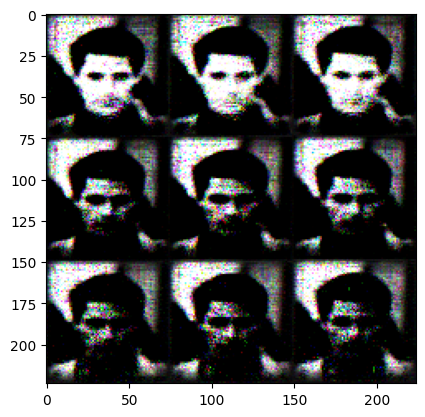

In [39]:
plt.imshow(pred_img[0])
plt.show()

# Reality:

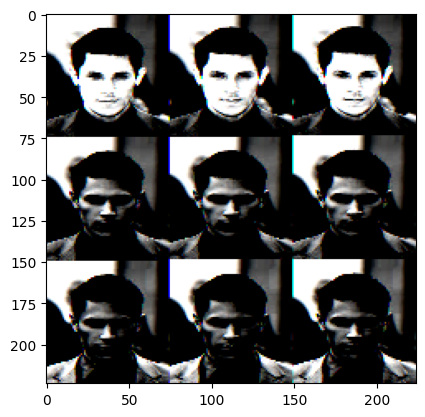

In [40]:
new_data = data.reshape(32,224,224,3)

plt.imshow(new_data[0])
plt.show()